In [68]:
from numpy import loadtxt
import io
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data (2).csv


In [69]:
dataset = loadtxt(io.BytesIO(uploaded['pima-indians-diabetes.data.csv']), delimiter=',')

In [70]:
df = pd.DataFrame(dataset)

In [71]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [72]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


In [73]:
df.groupby('Outcome').size()

Outcome
0.00    500
1.00    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3120f1afd0>,
      dtype=object)

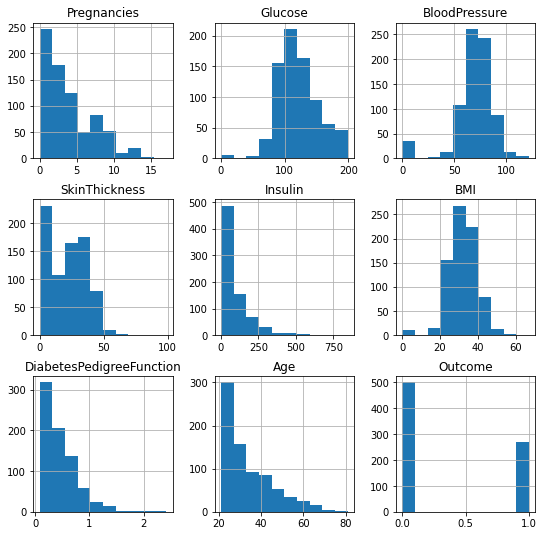

In [74]:
df.hist(figsize=(9, 9))

Outcome
0.00    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1.00    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

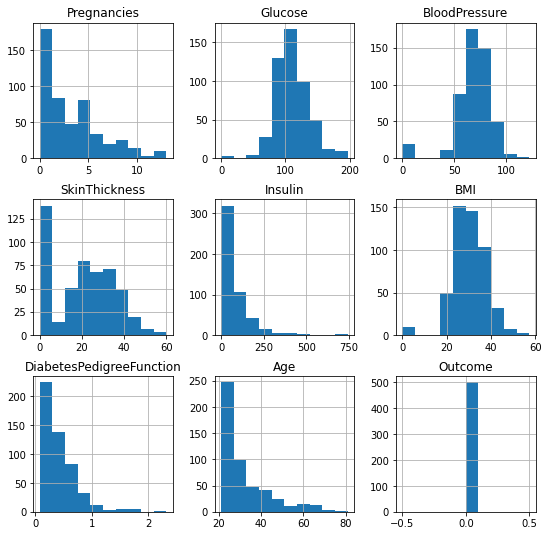

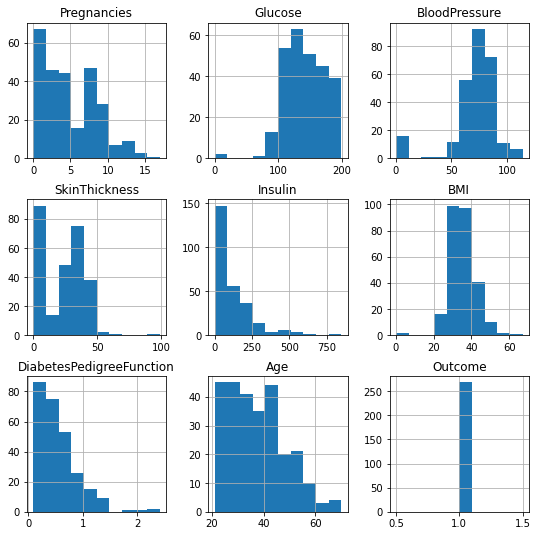

In [75]:
df.groupby('Outcome').hist(figsize=(9, 9))

In [76]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [77]:
df2 = df.drop(['Outcome'], axis=1)
y = df[['Outcome']]
print(df2.shape) 
print(y.shape)

(768, 8)
(768, 1)


In [78]:
df.iloc[: , :-1].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [79]:
count = (df.iloc[: , :-1] == 0).sum()
count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [80]:
df.iloc[: , :-1].replace(0, np.nan, inplace=True)

In [81]:
count2 = (df.iloc[: , :-1] == 0).sum()
count2

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [82]:
df.iloc[: , :-1]=df.iloc[: , :-1].fillna(df.iloc[: , :-1].mean())
df.iloc[: , :-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.00,148.00,72.00,35.00,155.55,33.60,0.63,50.00
1,1.00,85.00,66.00,29.00,155.55,26.60,0.35,31.00
2,8.00,183.00,64.00,29.15,155.55,23.30,0.67,32.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00
4,4.49,137.00,40.00,35.00,168.00,43.10,2.29,33.00
...,...,...,...,...,...,...,...,...
763,10.00,101.00,76.00,48.00,180.00,32.90,0.17,63.00
764,2.00,122.00,70.00,27.00,155.55,36.80,0.34,27.00
765,5.00,121.00,72.00,23.00,112.00,26.20,0.24,30.00
766,1.00,126.00,60.00,29.15,155.55,30.10,0.35,47.00


In [83]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()  
df2_std = pd.DataFrame(sc.fit_transform(df2))
df2_std.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df2_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02
...,...,...,...,...,...,...,...,...
763,1.83,-0.62,0.36,1.72,0.87,0.12,-0.91,2.53
764,-0.55,0.03,0.05,0.41,-0.69,0.61,-0.40,-0.53
765,0.34,0.00,0.15,0.15,0.28,-0.74,-0.69,-0.28
766,-0.84,0.16,-0.47,-1.29,-0.69,-0.24,-0.37,1.17


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2_std, y, test_size=0.20, random_state=10)

In [85]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [86]:
def create_nlp_model(learning_rate, dropout_rate): 
  model = Sequential() 
  model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(16, activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(1, activation='sigmoid')) 
  adam = Adam(lr=learning_rate) 
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [87]:
# Set the hyperparameters
dropout_rate = 0.1 
epochs = 200
batch_size = 4 
learn_rate = 0.001

In [88]:
nlp_model = create_nlp_model(learn_rate, dropout_rate)

In [89]:
model_history = nlp_model.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6372 - accuracy: 0.6538 - val_loss: 0.5941 - val_accuracy: 0.7236
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7230 - val_loss: 0.5480 - val_accuracy: 0.7317
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7413 - val_loss: 0.5131 - val_accuracy: 0.7724
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7800 - val_loss: 0.4979 - val_accuracy: 0.7642
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7617 - val_loss: 0.4937 - val_accuracy: 0.7642
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7780 - val_loss: 0.4833 - val_accuracy: 0.7724
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7760 - val_loss: 0.4796 - val_accuracy: 0.7642

In [90]:
model_history = nlp_model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
123/123 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8717 - val_loss: 0.7242 - val_accuracy: 0.7317
Epoch 2/200
123/123 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8635 - val_loss: 0.7202 - val_accuracy: 0.7398
Epoch 3/200
123/123 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8798 - val_loss: 0.7365 - val_accuracy: 0.7398
Epoch 4/200
123/123 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.8819 - val_loss: 0.7270 - val_accuracy: 0.7561
Epoch 5/200
123/123 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8513 - val_loss: 0.7272 - val_accuracy: 0.7480
Epoch 6/200
123/123 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8697 - val_loss: 0.7364 - val_accuracy: 0.7480
Epoch 7/200
123/123 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8534 - val_loss: 0.7217 - val_accuracy: 0.7480

In [91]:
accuracies = nlp_model.evaluate(X_test, y_test, verbose=1)
print('Test Score;', accuracies[0]) 
print('Test Accuracy:', accuracies[1])

5/5 [==============================] - 0s 3ms/step - loss: 0.9406 - accuracy: 0.7143
Test Score; 0.9406201243400574
Test Accuracy: 0.7142857313156128


In [92]:
y_pred = nlp_model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [93]:
from sklearn.metrics import classification_report
import numpy as np
nlp_report = classification_report(y_test,np.round(abs(y_pred)))
print('The Classification report is: \n',nlp_report)

The Classification report is: 
               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        95
         1.0       0.65      0.54      0.59        59

    accuracy                           0.71       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154



In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [95]:
from sklearn.metrics import roc_curve
y_pred_keras = nlp_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

5/5 [==============================] - 0s 3ms/step


In [96]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

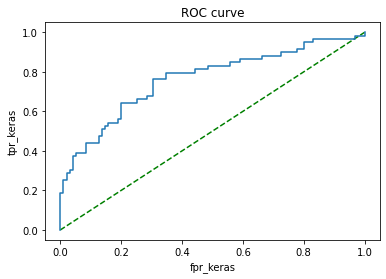

In [97]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'g--')
plt.plot(fpr_keras, tpr_keras, label='Keras')
plt.xlabel('fpr_keras')
plt.ylabel('tpr_keras')
plt.title('ROC curve')
plt.show()

In [101]:
#Increasing the epoch value, can cause overfitting, but when optimimally increased can increase the accuracy of the model

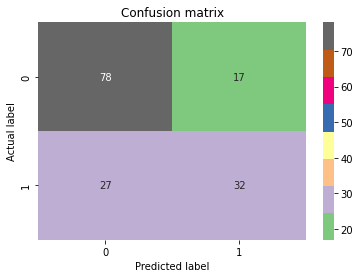

In [98]:
import sklearn.metrics as metrics
import seaborn as sns
matrix_cnf = metrics.confusion_matrix(y_test,np.round(abs(y_pred_keras)))
p = sns.heatmap(pd.DataFrame(matrix_cnf), annot=True, cmap="Accent" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [100]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 24%|██▍       | 10/42 [00:00<00:01, 21.18it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [00:07<00:00,  5.73it/s]

[01:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.27,0.31,0.40,0.29
GradientBoostingRegressor,0.26,0.30,0.41,0.18
XGBRegressor,0.26,0.30,0.41,0.06
SGDRegressor,0.24,0.28,0.41,0.01
ExtraTreesRegressor,0.24,0.28,0.41,0.16
TransformedTargetRegressor,0.24,0.28,0.41,0.02
LinearRegression,0.24,0.28,0.41,0.02
LassoLarsCV,0.24,0.28,0.41,0.03
LarsCV,0.24,0.28,0.41,0.04
